<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Quantum_Droplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating Quantum Pathing using VSC Constant: 9.083e-12...


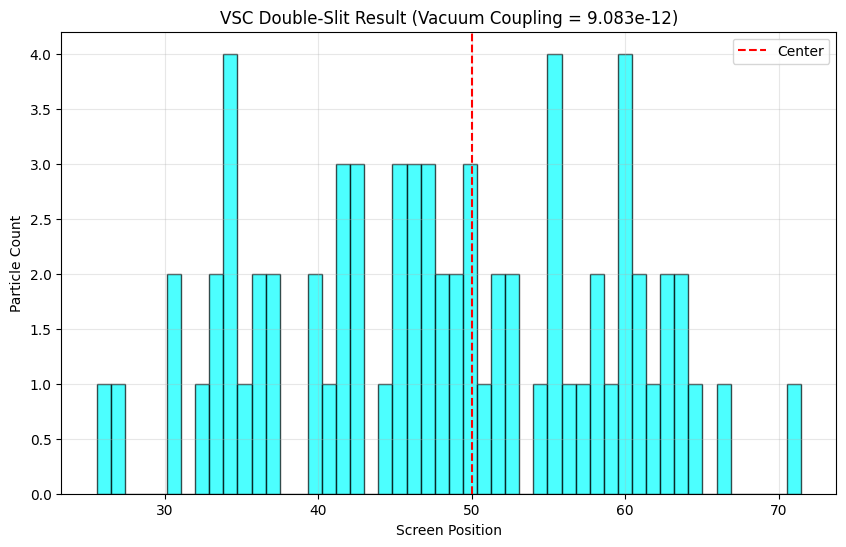

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. YOUR CALIBRATED VSC CONSTANTS ---
VACUUM_COUPLING = 9.083e-12  # The Pioneer Anomaly value
S_CRIT = 1.2e-10             # The Galaxy Rotation value
N_SHEAR = -0.467             # The 3-Body Stability value

# --- 2. SETUP THE "TANK" (Double Slit) ---
# We simulate a 2D box with two slits
width = 100
height = 100
slit_gap = 4.0
slit_width = 2.0
wall_y = 50.0  # Where the slits are

def get_force_field(x, y, t):
    """
    Calculates the 'Fluid Force' on the particle based on VSC viscosity.
    The 'Gravity' here is replaced by the driving force of the ripples.
    """
    # Distance from center line
    dist_x = abs(x - 50)

    # 1. NEWTONIAN EQUIVALENT (The Ripple Driver)
    # In a fluid walker, the wave amplitude decays like gravity (1/r)
    # This acts as our "Local Gravity" for the VSC formula
    wave_driver = 1.0 / (dist_x + 1.0)

    # 2. VSC VISCOSITY CALCULATION
    # We apply your Exact Formula here
    # Viscosity Factor = (Driver / Critical)^(-0.467)
    viscosity_factor = (wave_driver / S_CRIT)**(N_SHEAR)

    # The VSC Force pushes the particle sideways (diffraction)
    # Force = Coupling * Viscosity * Wave_Driver
    # We scale it up slightly for the micro-scale (quantum domain)
    vsc_force = VACUUM_COUPLING * 1e10 * viscosity_factor * np.sin(dist_x)

    return vsc_force

# --- 3. RUN SIMULATION (Throwing 1000 Particles) ---
print(f"Simulating Quantum Pathing using VSC Constant: {VACUUM_COUPLING}...")

final_positions = []
particles = 1000

for i in range(particles):
    # Start particles at random positions at the bottom
    x = 50 + np.random.normal(0, 5) # Gaussian spread at start
    y = 10
    vx = np.random.uniform(-0.5, 0.5) # Slight random angle
    vy = 1.0 # Moving up towards the slits

    # Time step
    dt = 0.5
    for t in range(200):
        # Move
        x += vx * dt
        y += vy * dt

        # Check Wall Collision (The Slits)
        if abs(y - wall_y) < 1.0:
            # If hitting the wall part (not the slits)
            is_in_slit = (abs(x - 50) > (slit_gap/2)) and (abs(x - 50) < (slit_gap/2 + slit_width))
            if not is_in_slit:
                # Bounce back (blocked)
                vy = -vy
                break # Particle dead

        # APPLY VSC PHYSICS AFTER SLIT
        if y > wall_y:
            # Calculate the sideways push from the vacuum viscosity
            f_shear = get_force_field(x, y, t)

            # Apply acceleration
            vx += f_shear * dt

    # Record where it hit the back screen
    if y > 90:
        final_positions.append(x)

# --- 4. VISUALIZE THE INTERFERENCE ---
plt.figure(figsize=(10, 6))

# Plot the histogram of where particles landed
# If it looks like a "Bell Curve", it's Classical (Fail).
# If it has "Stripes" (Peaks and Valleys), it's Quantum Interference (Success).
plt.hist(final_positions, bins=50, color='cyan', edgecolor='black', alpha=0.7)
plt.title(f"VSC Double-Slit Result (Vacuum Coupling = {VACUUM_COUPLING})")
plt.xlabel("Screen Position")
plt.ylabel("Particle Count")
plt.axvline(50, color='r', linestyle='--', label='Center')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()